### Part 2: Regression Task

Our goal is to build a generalized model, which we could then use to accept a rebound signal, and output an expected rock density. This will help us decide which cutting shield to use for this type of rock structure based solely on rebound signal measurement. We will compare a variety of regression models (even though some may perform poorly):

* Linear Regression
* Polynomial Regression
* KNN Regression
* Decision Tree Regression
* Support Vector Regression
* Boosted Trees Regression
* Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [4]:
df = pd.read_csv('./data/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [10]:
df.describe()

,Signal,Density
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [5]:
df.columns = ['Signal', 'Density']
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


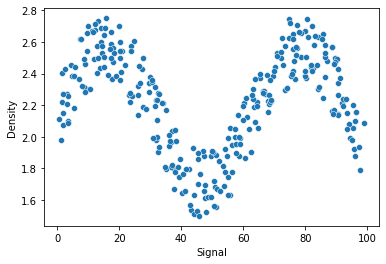

In [6]:
sns.scatterplot(x='Signal', y='Density', data=df);

In [7]:
X = df['Signal'].values.reshape(-1, 1)  # must reshape when we have a single feature column
y = df['Density']

In [8]:
# you can scale the data later

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg_model = LinearRegression()

In [13]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [14]:
linreg_pred = linreg_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mean_absolute_error(y_test, linreg_pred)

0.211198973318633

In [17]:
np.sqrt(mean_squared_error(y_test, linreg_pred))

0.2570051996584629

In [19]:
signal_range = np.arange(0, 101)

# linear regression model
y_lin = linreg_model.predict(signal_range.reshape(-1, 1))
y_lin

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

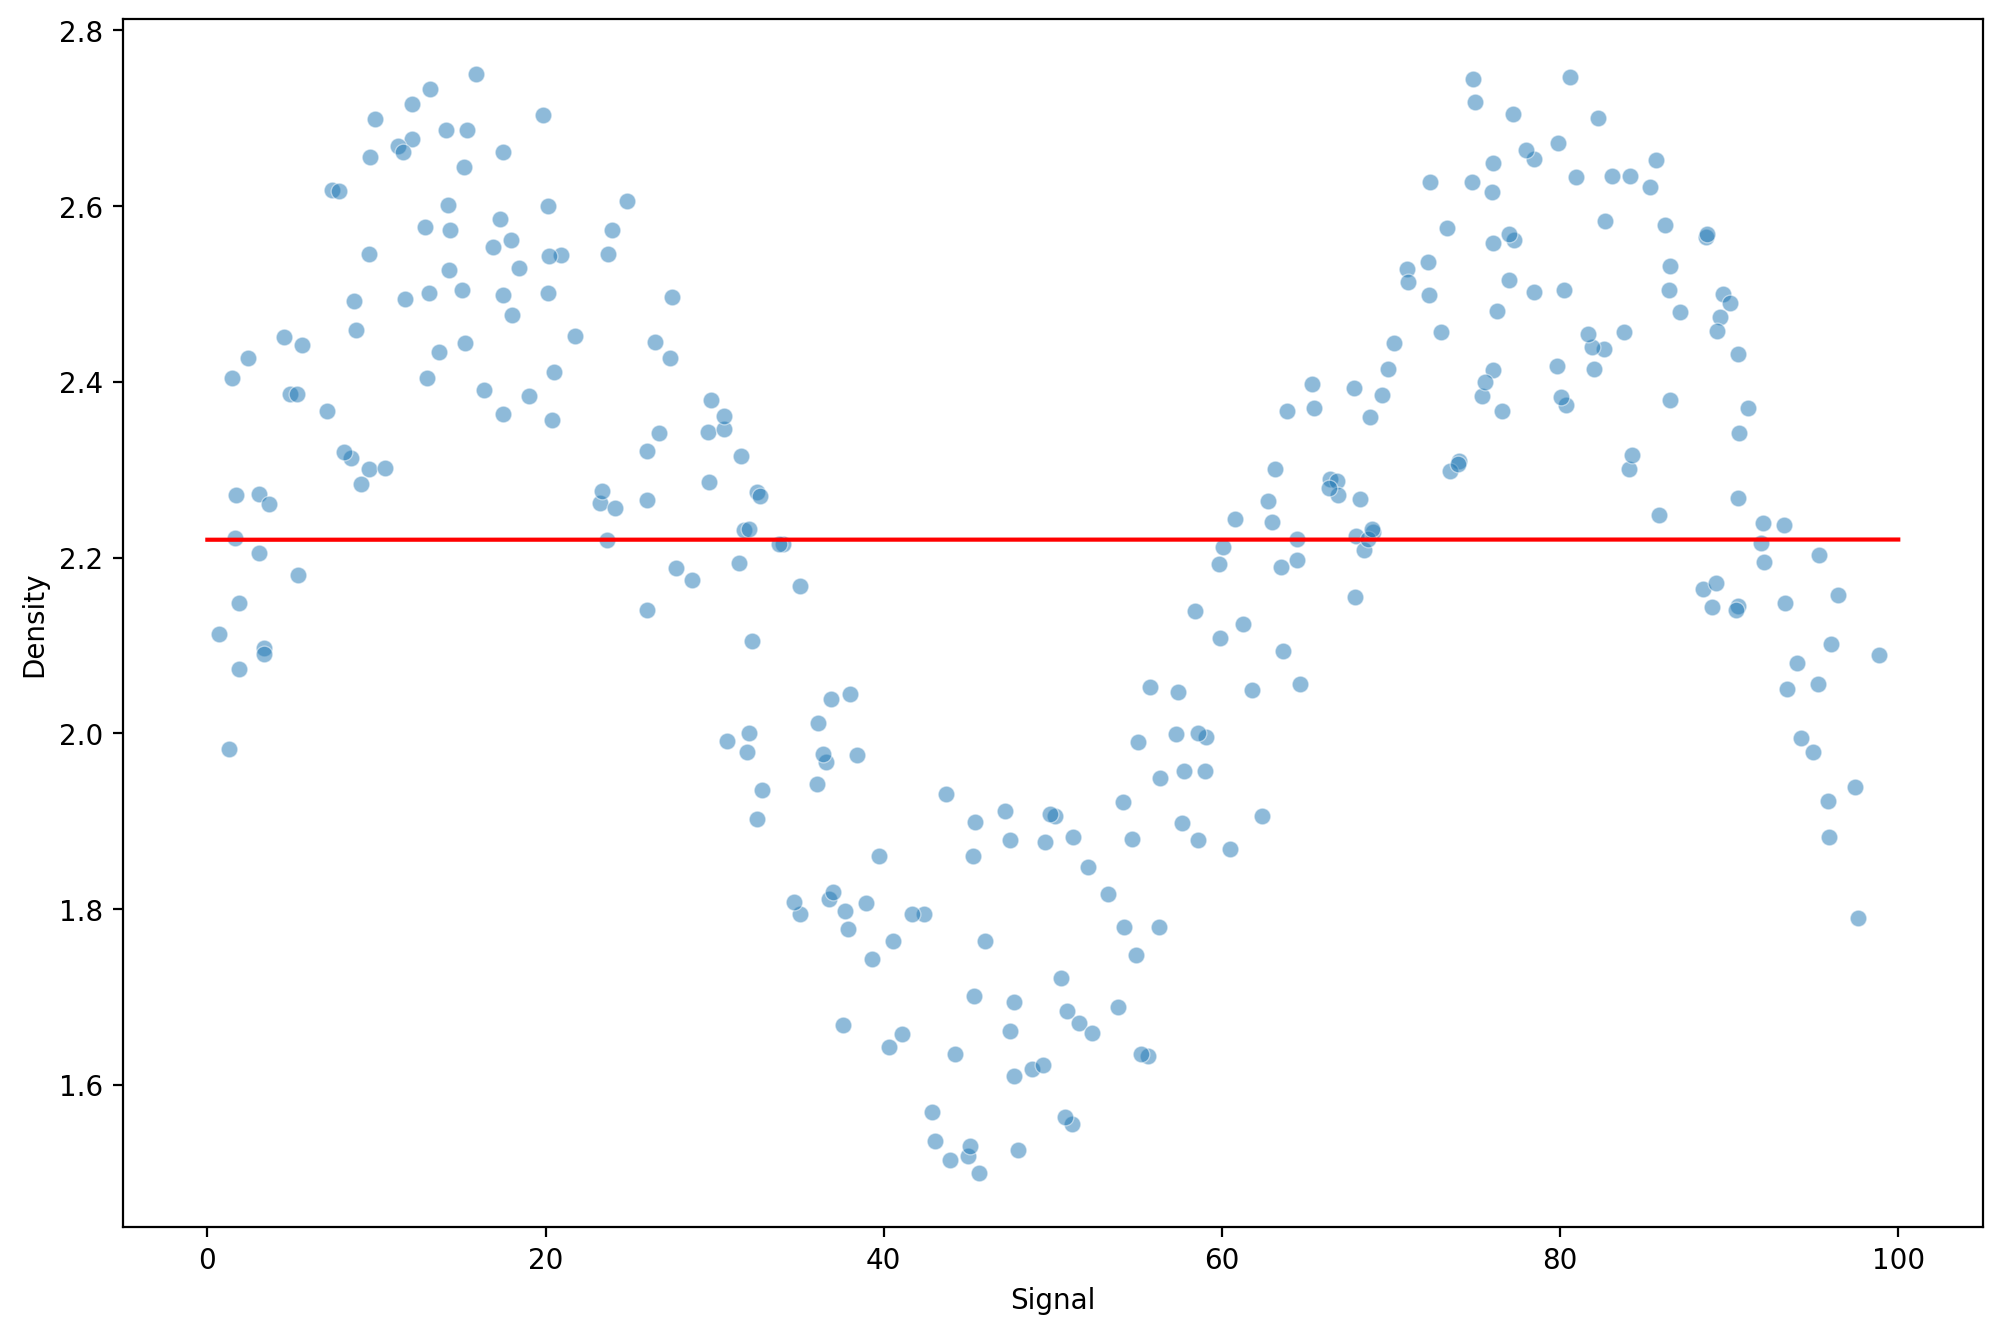

In [21]:
plt.figure(figsize=(12,8), dpi=200)

sns.scatterplot(x='Signal', y='Density', data=df, alpha=0.5);
plt.plot(signal_range, y_lin, 'r-')

plt.show()

### Polynomial Regression

In [22]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    
    # GET METRICS
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 101)
    output = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, alpha=0.5, color='black');
    
    plt.plot(signal_range, output)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


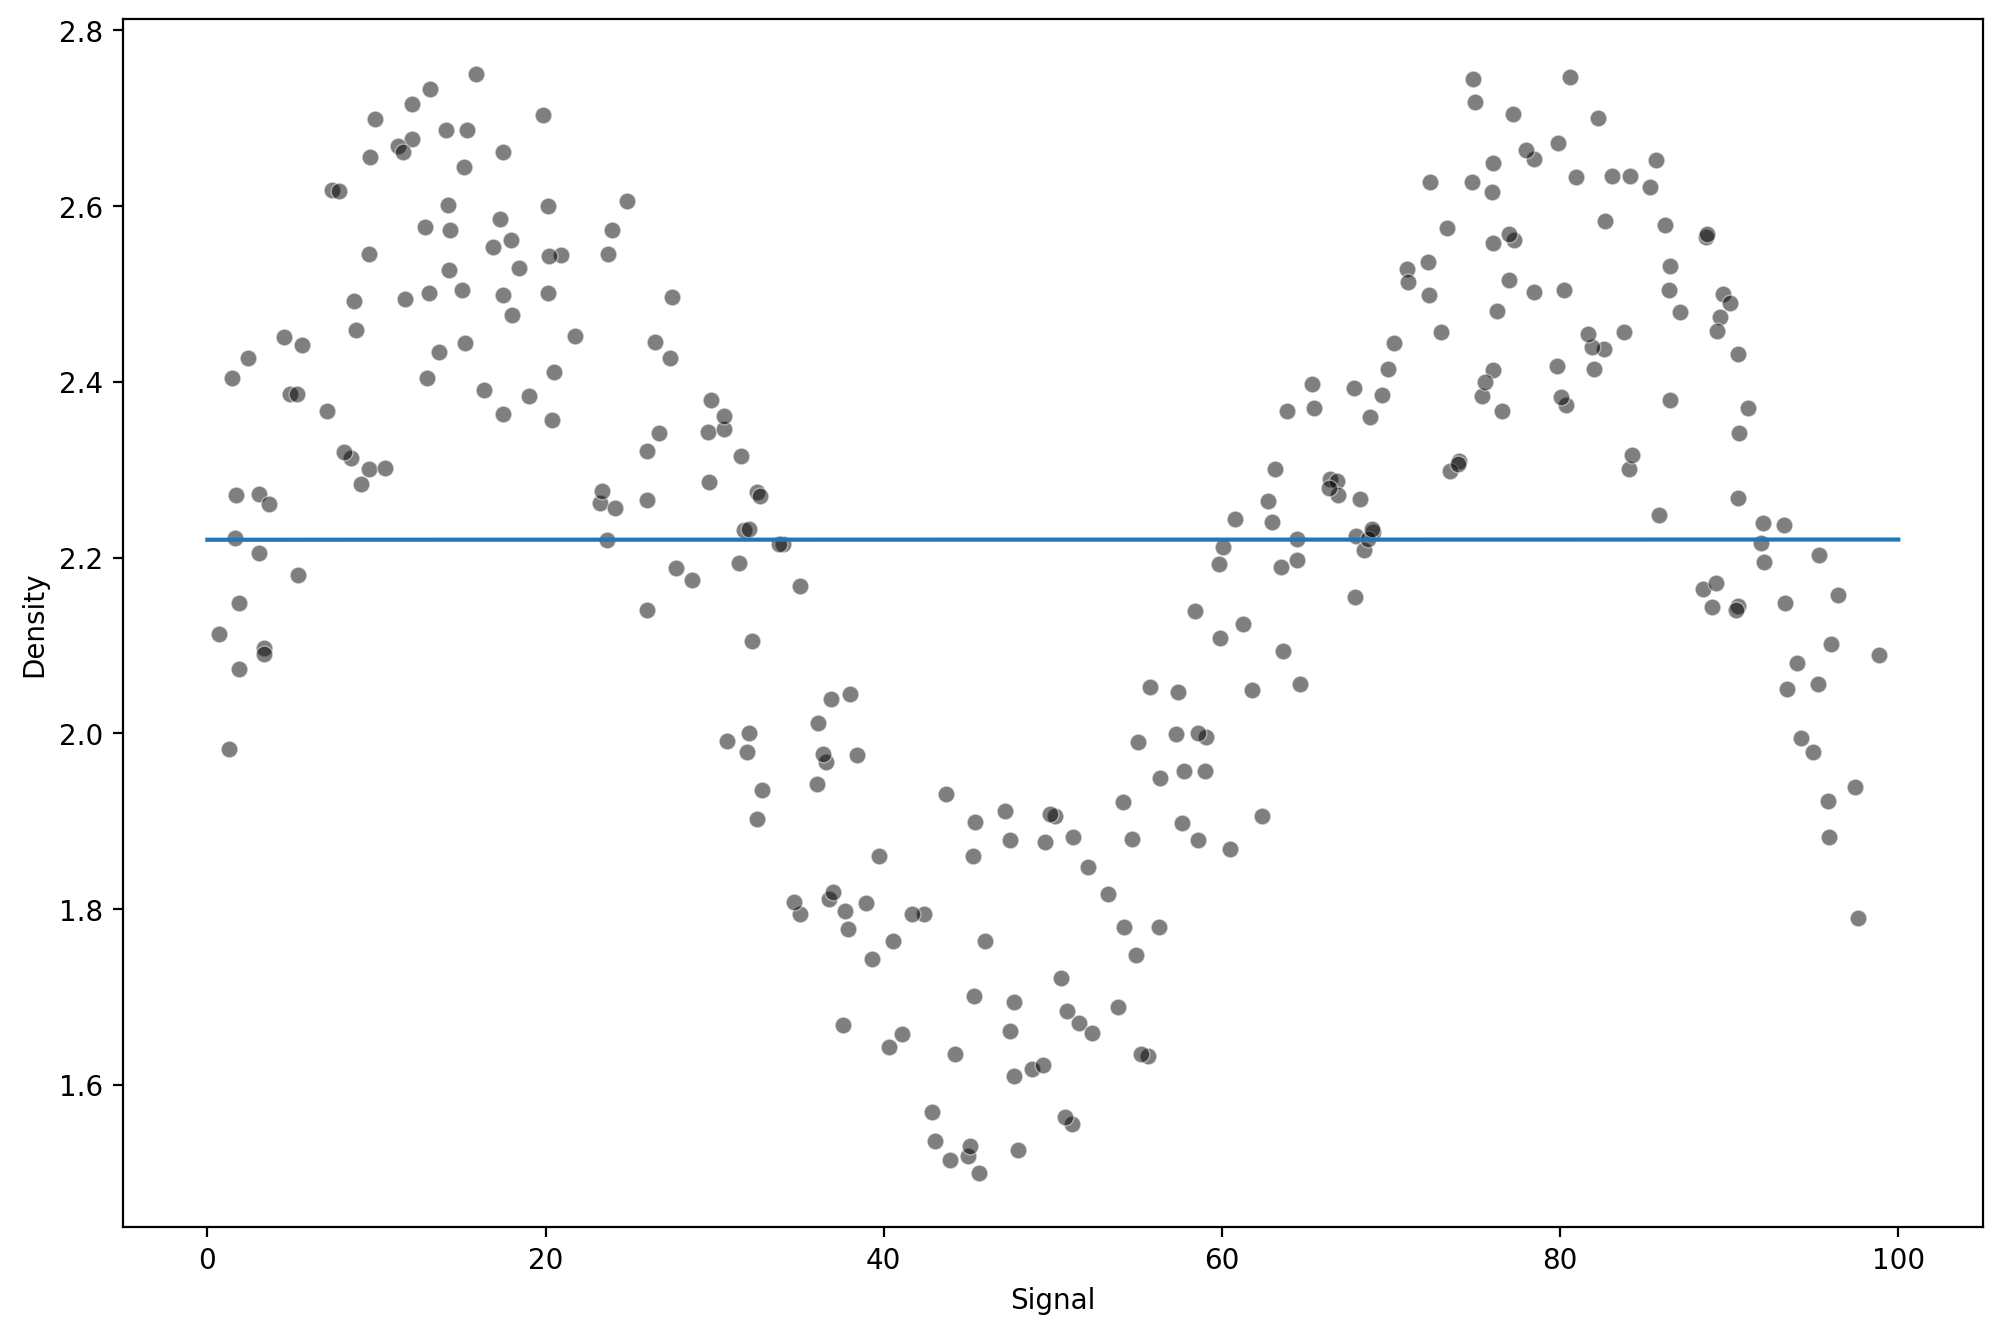

In [24]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [25]:
# PIPELINE FOR TESTING DIFFERENT POLYNOMIAL ORDERS
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

MAE: 0.11969085253552043
RMSE: 0.13807383449323551


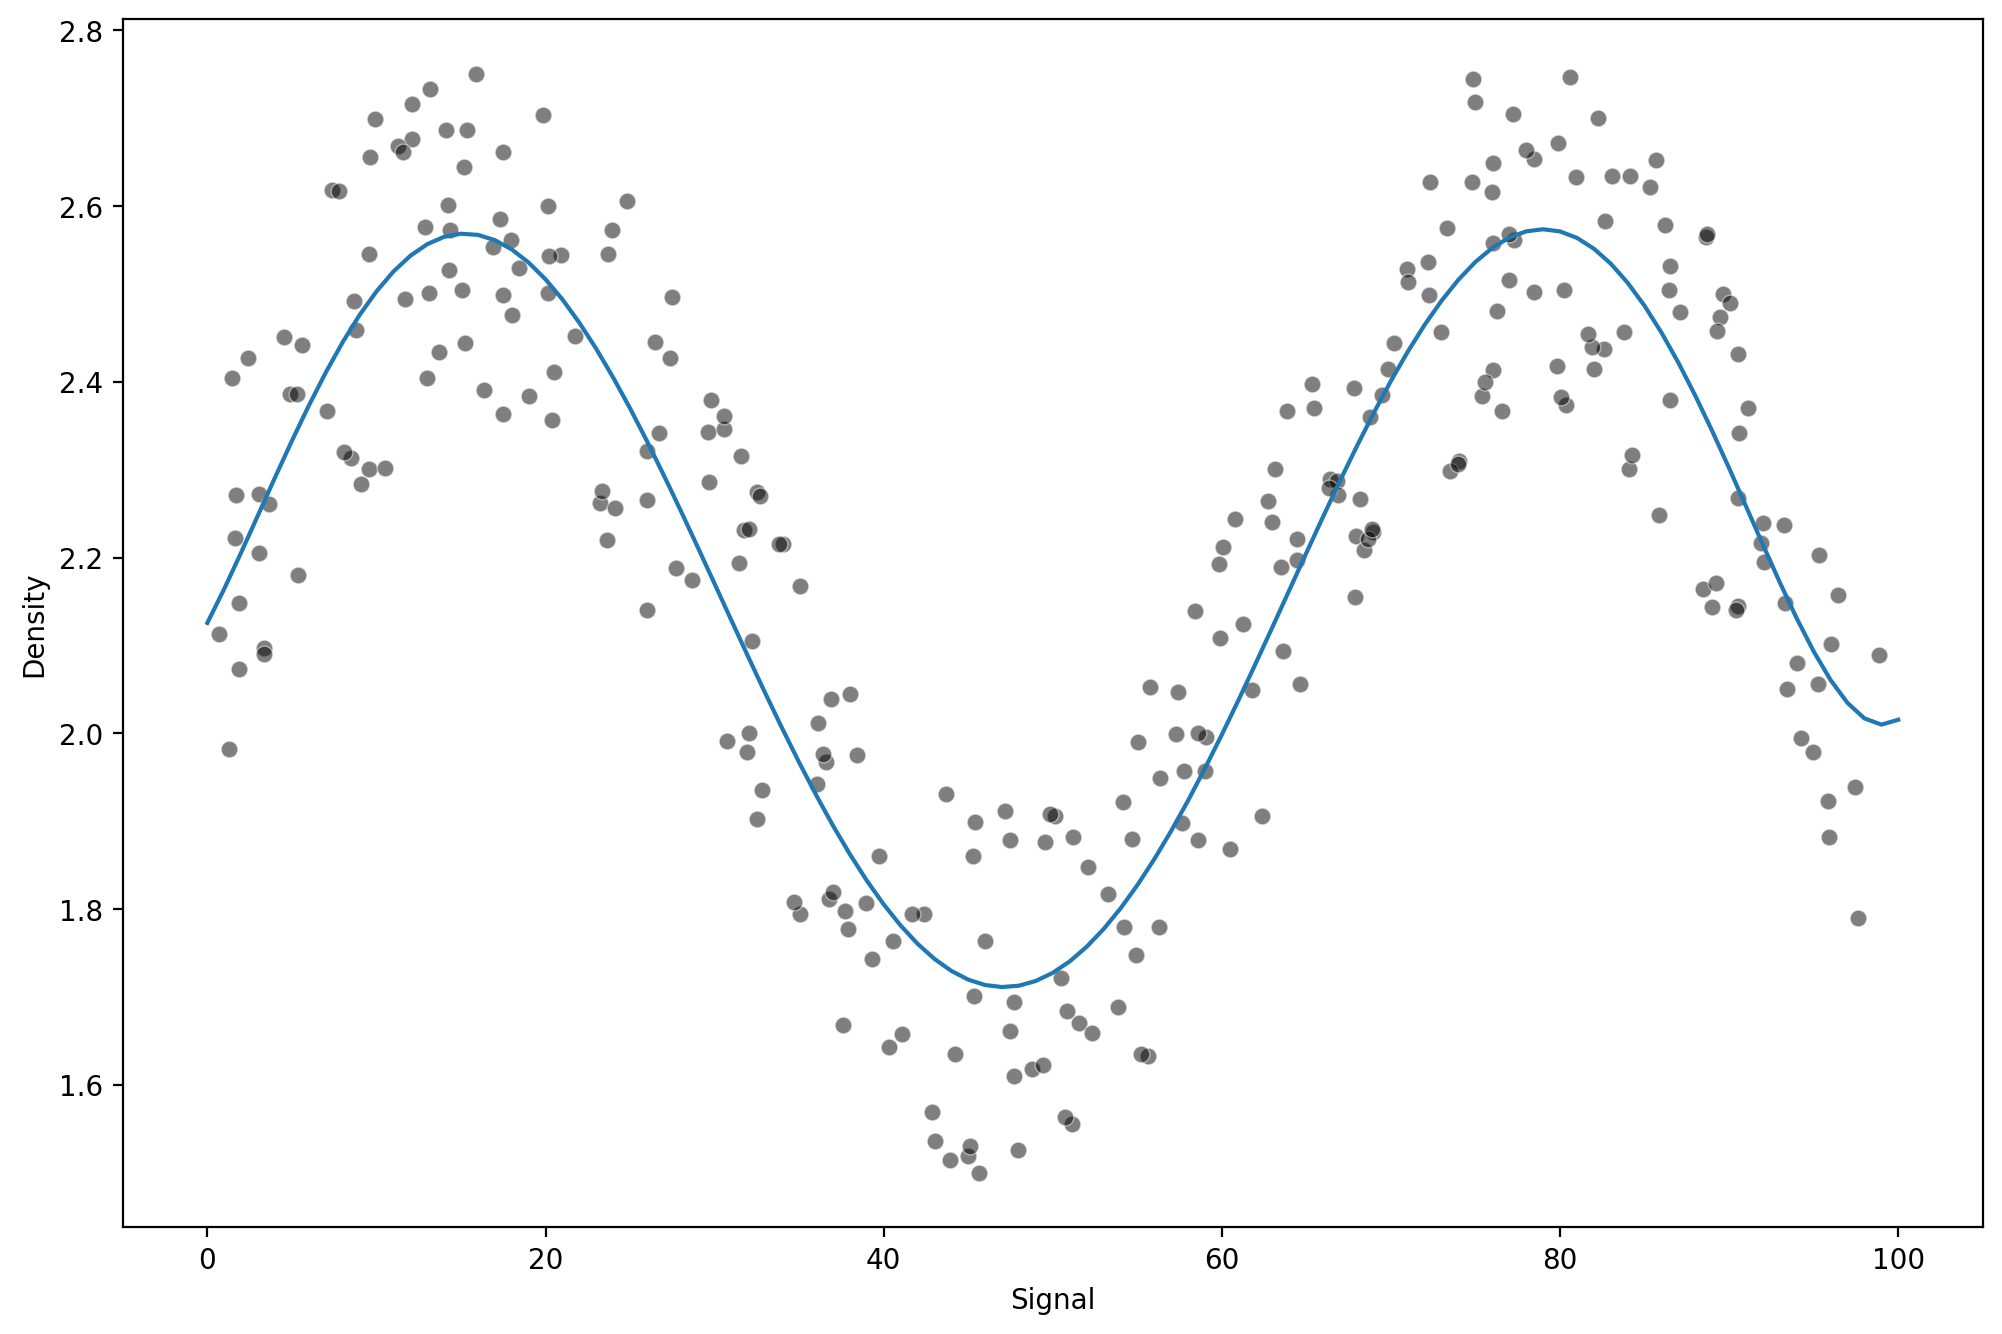

In [33]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

### Random Forests

In [34]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.116848629154335
RMSE: 0.14030131751235314
MAE: 0.12391253749960371
RMSE: 0.13891051654980408
MAE: 0.12100558240138312
RMSE: 0.1384265533347639
MAE: 0.11554217938949125
RMSE: 0.13385764085909094


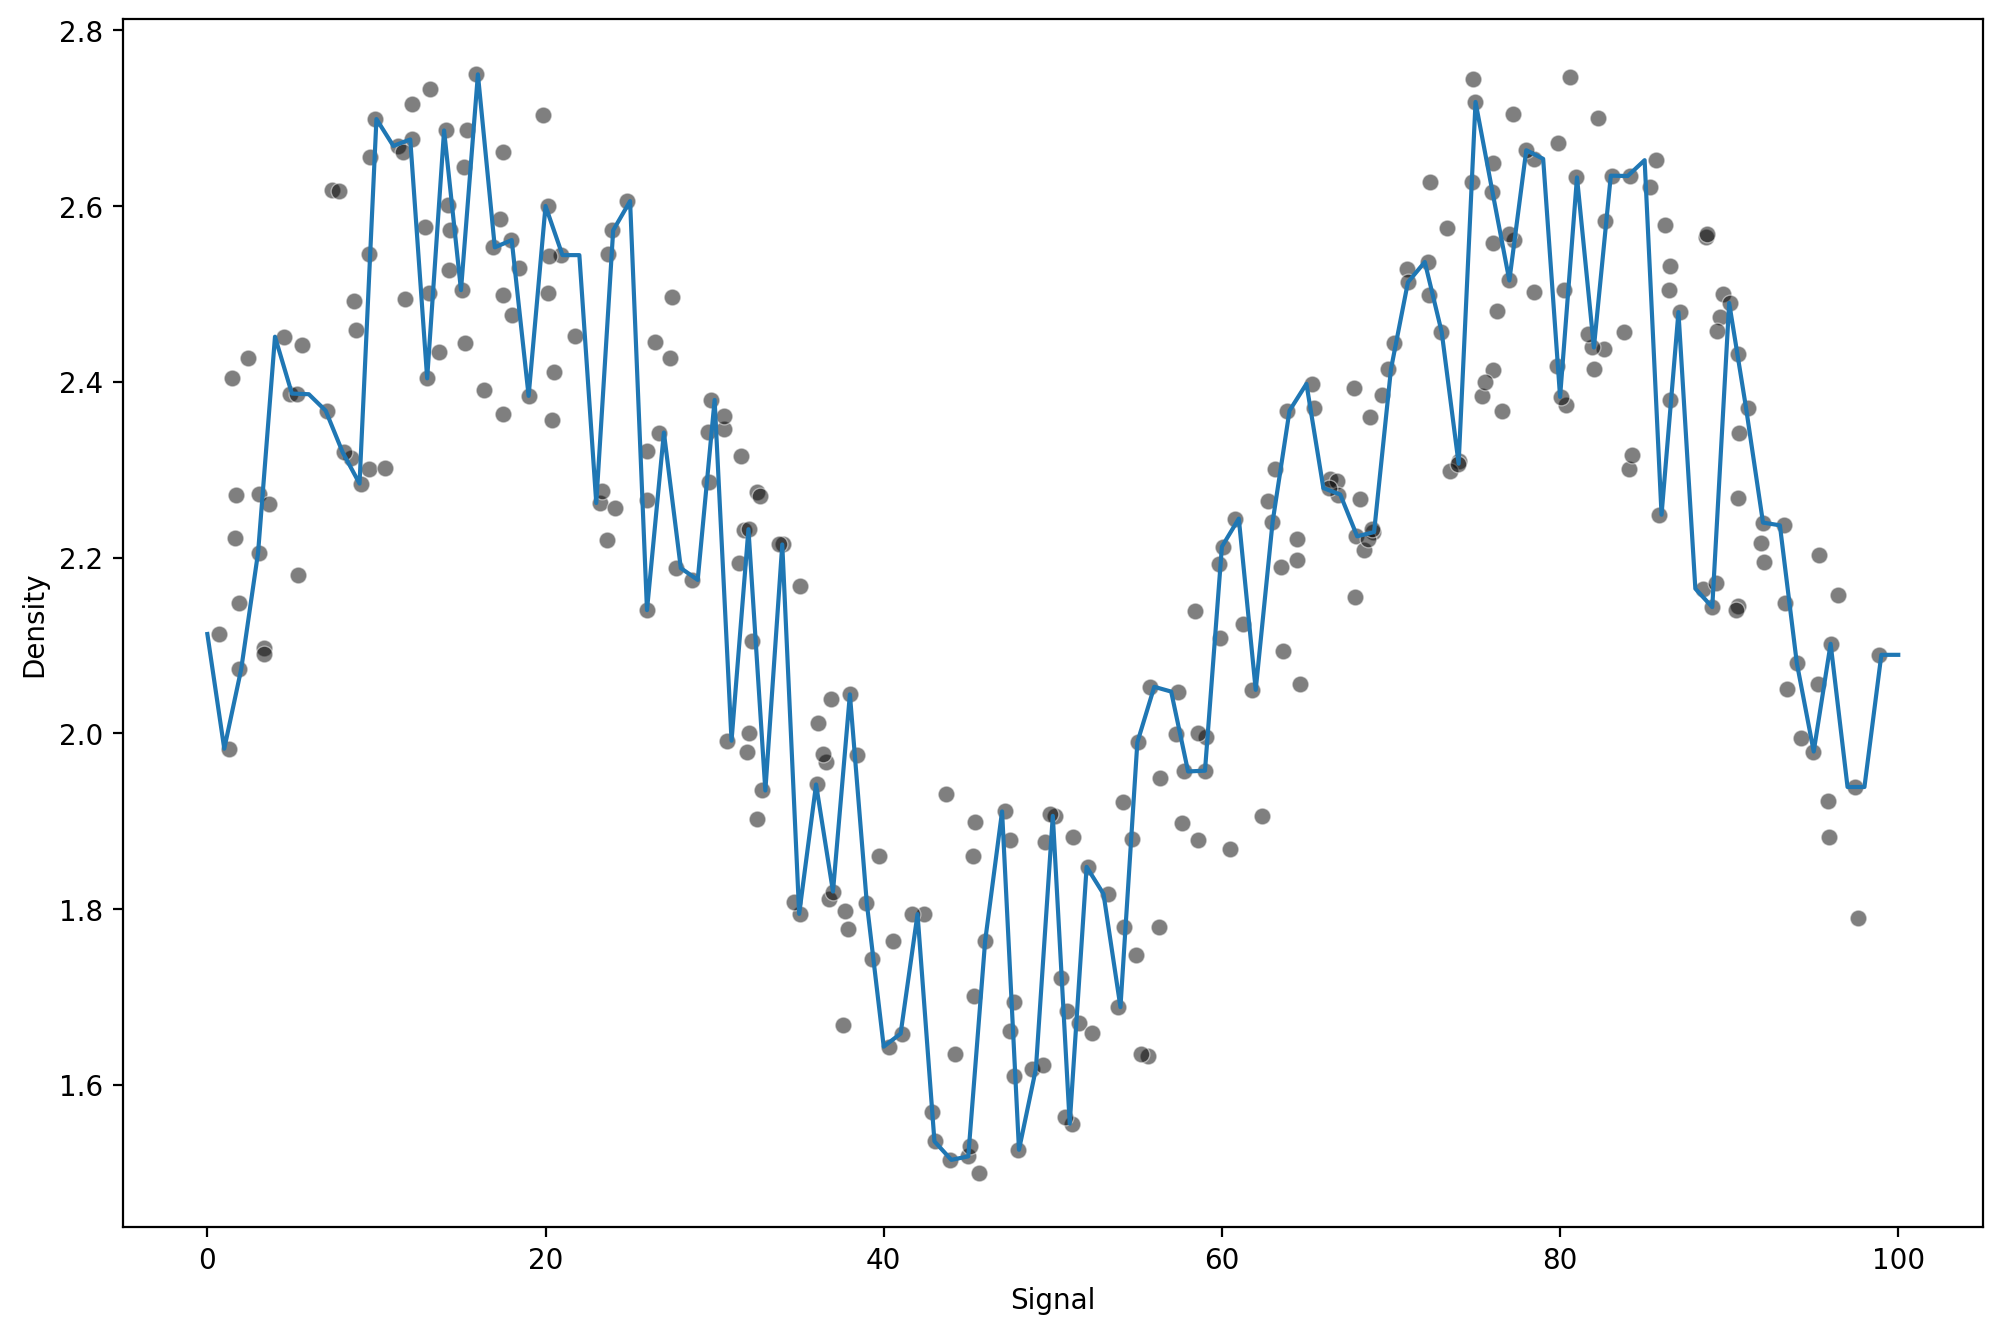

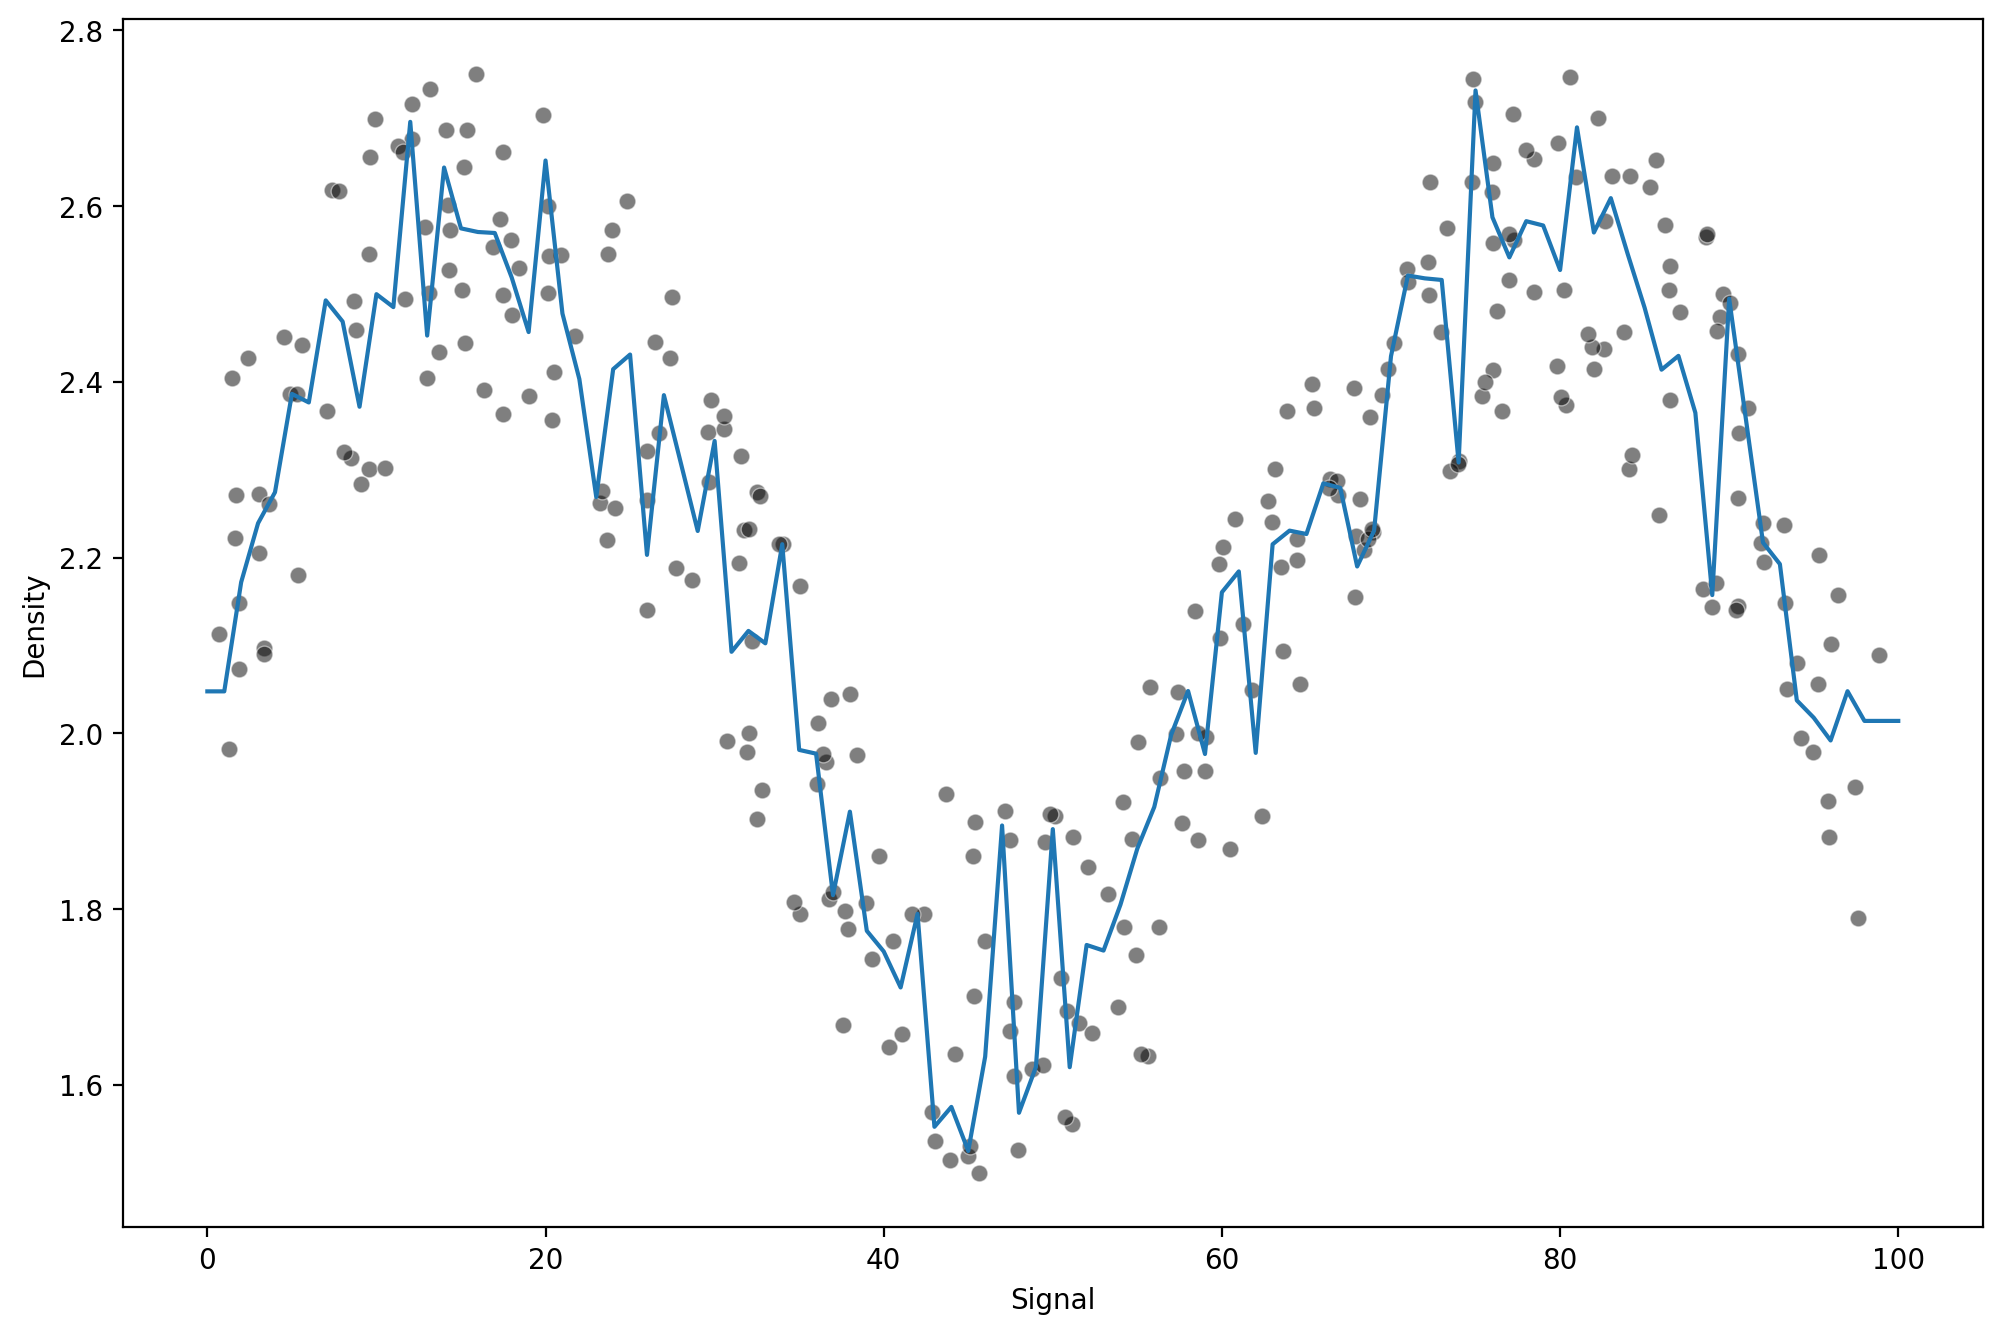

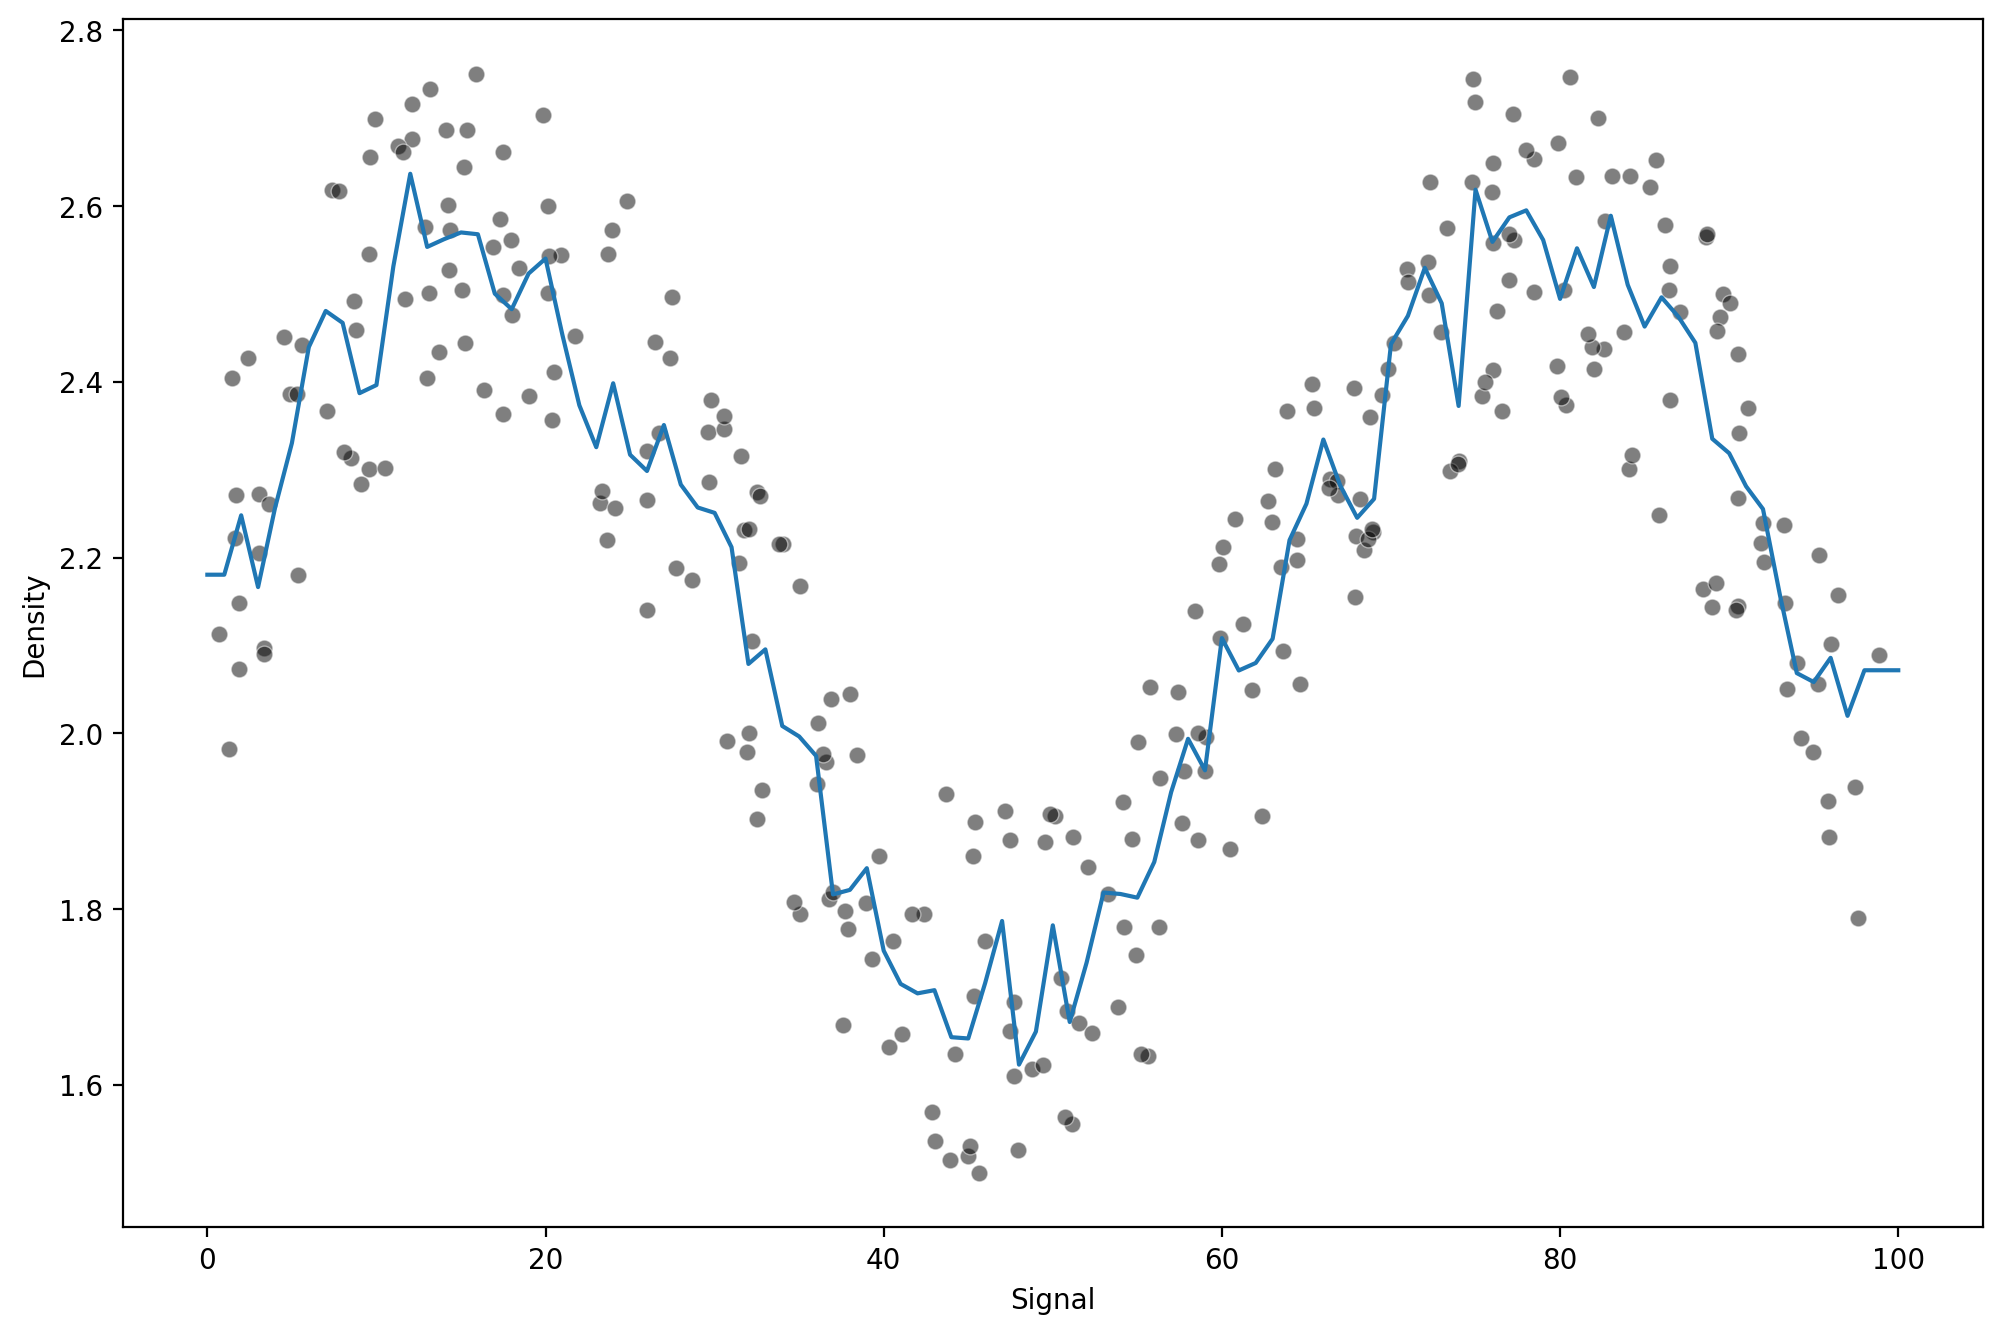

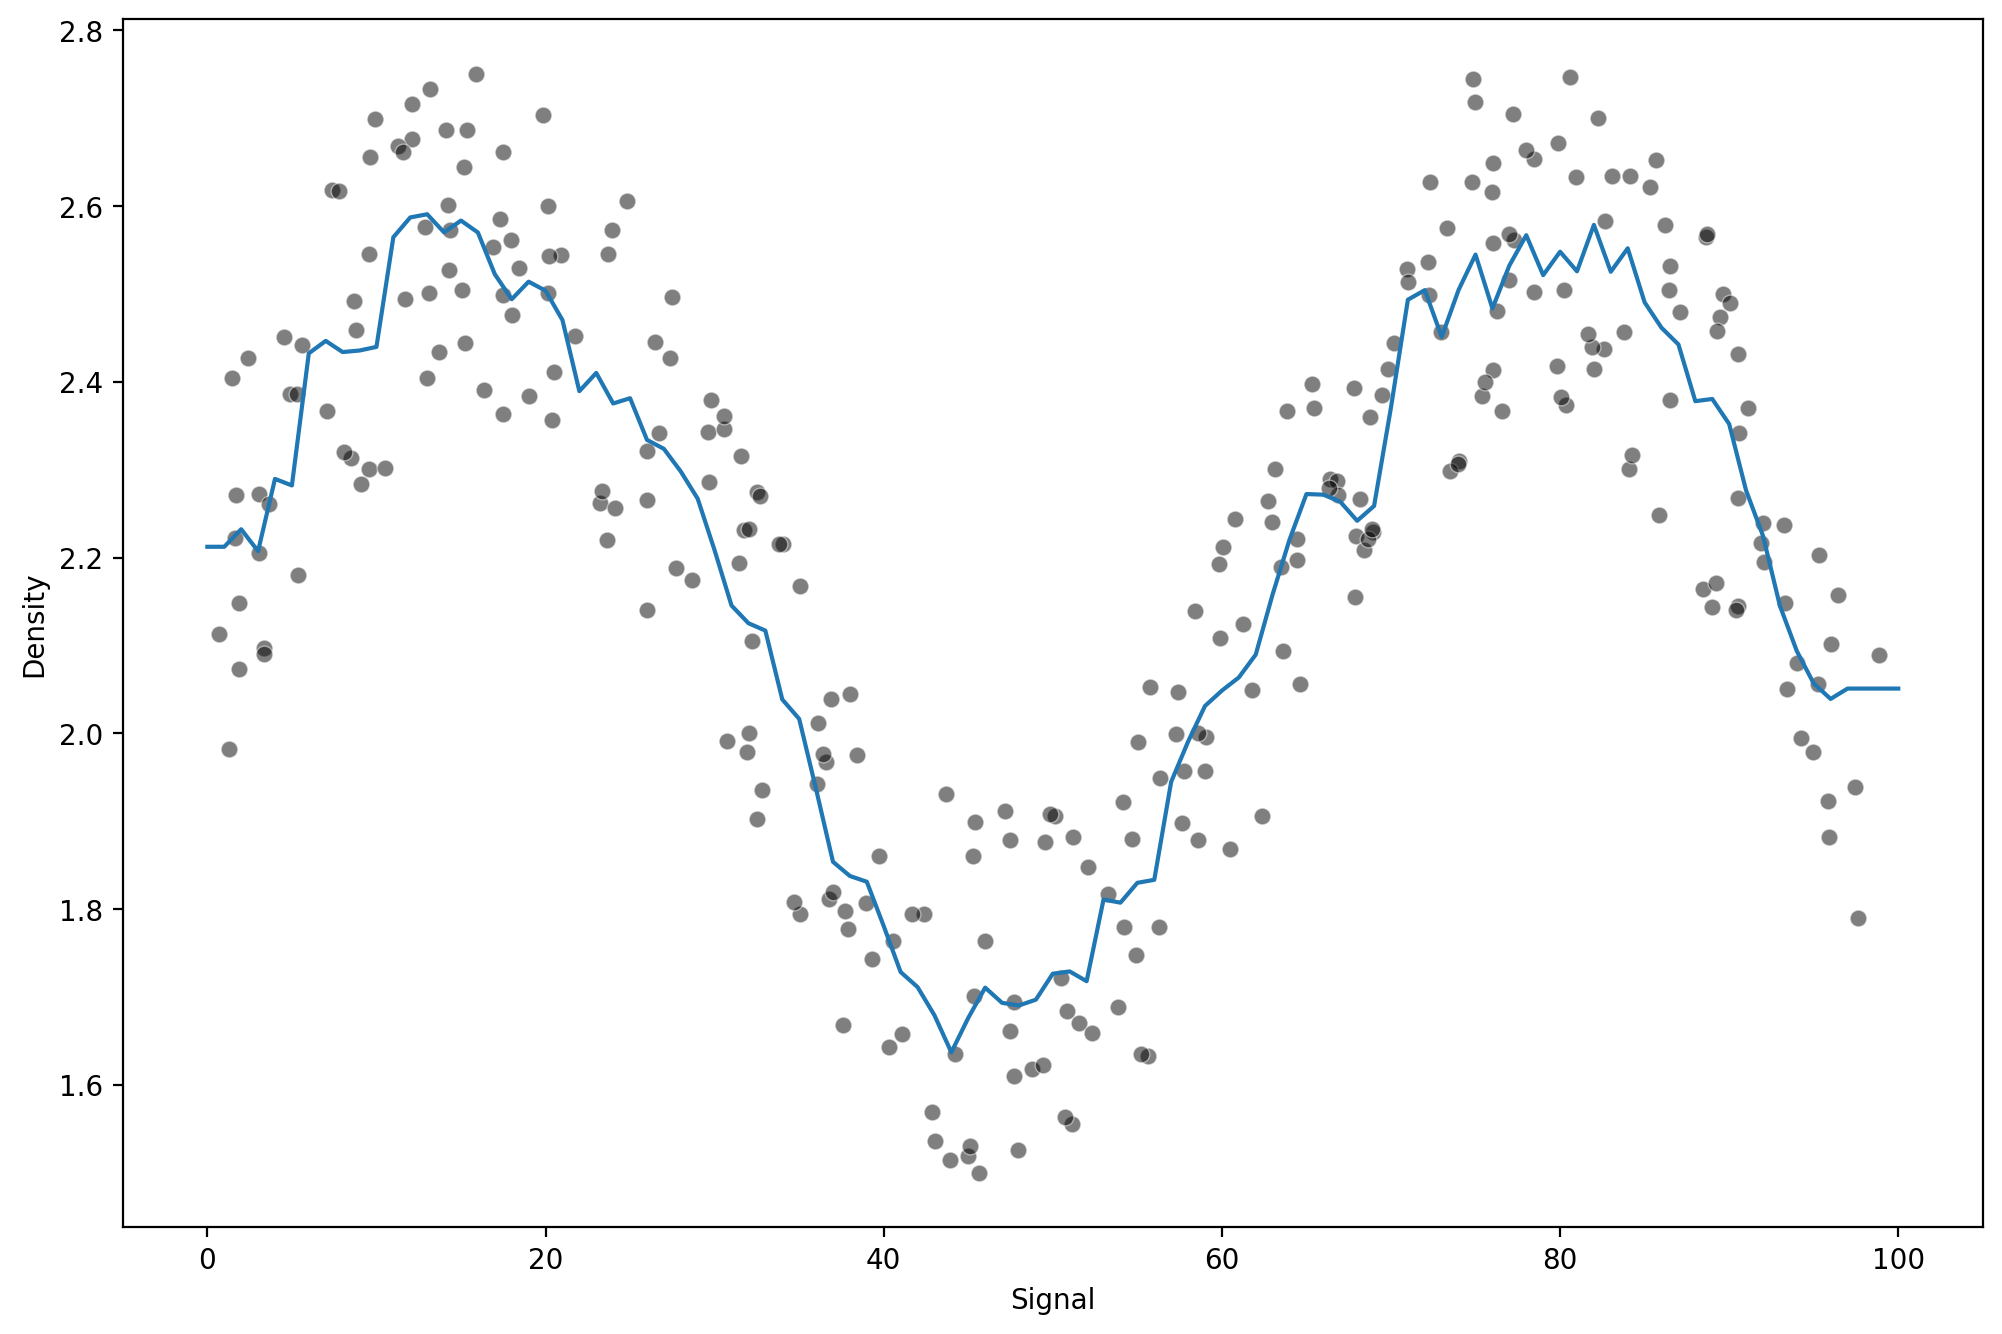

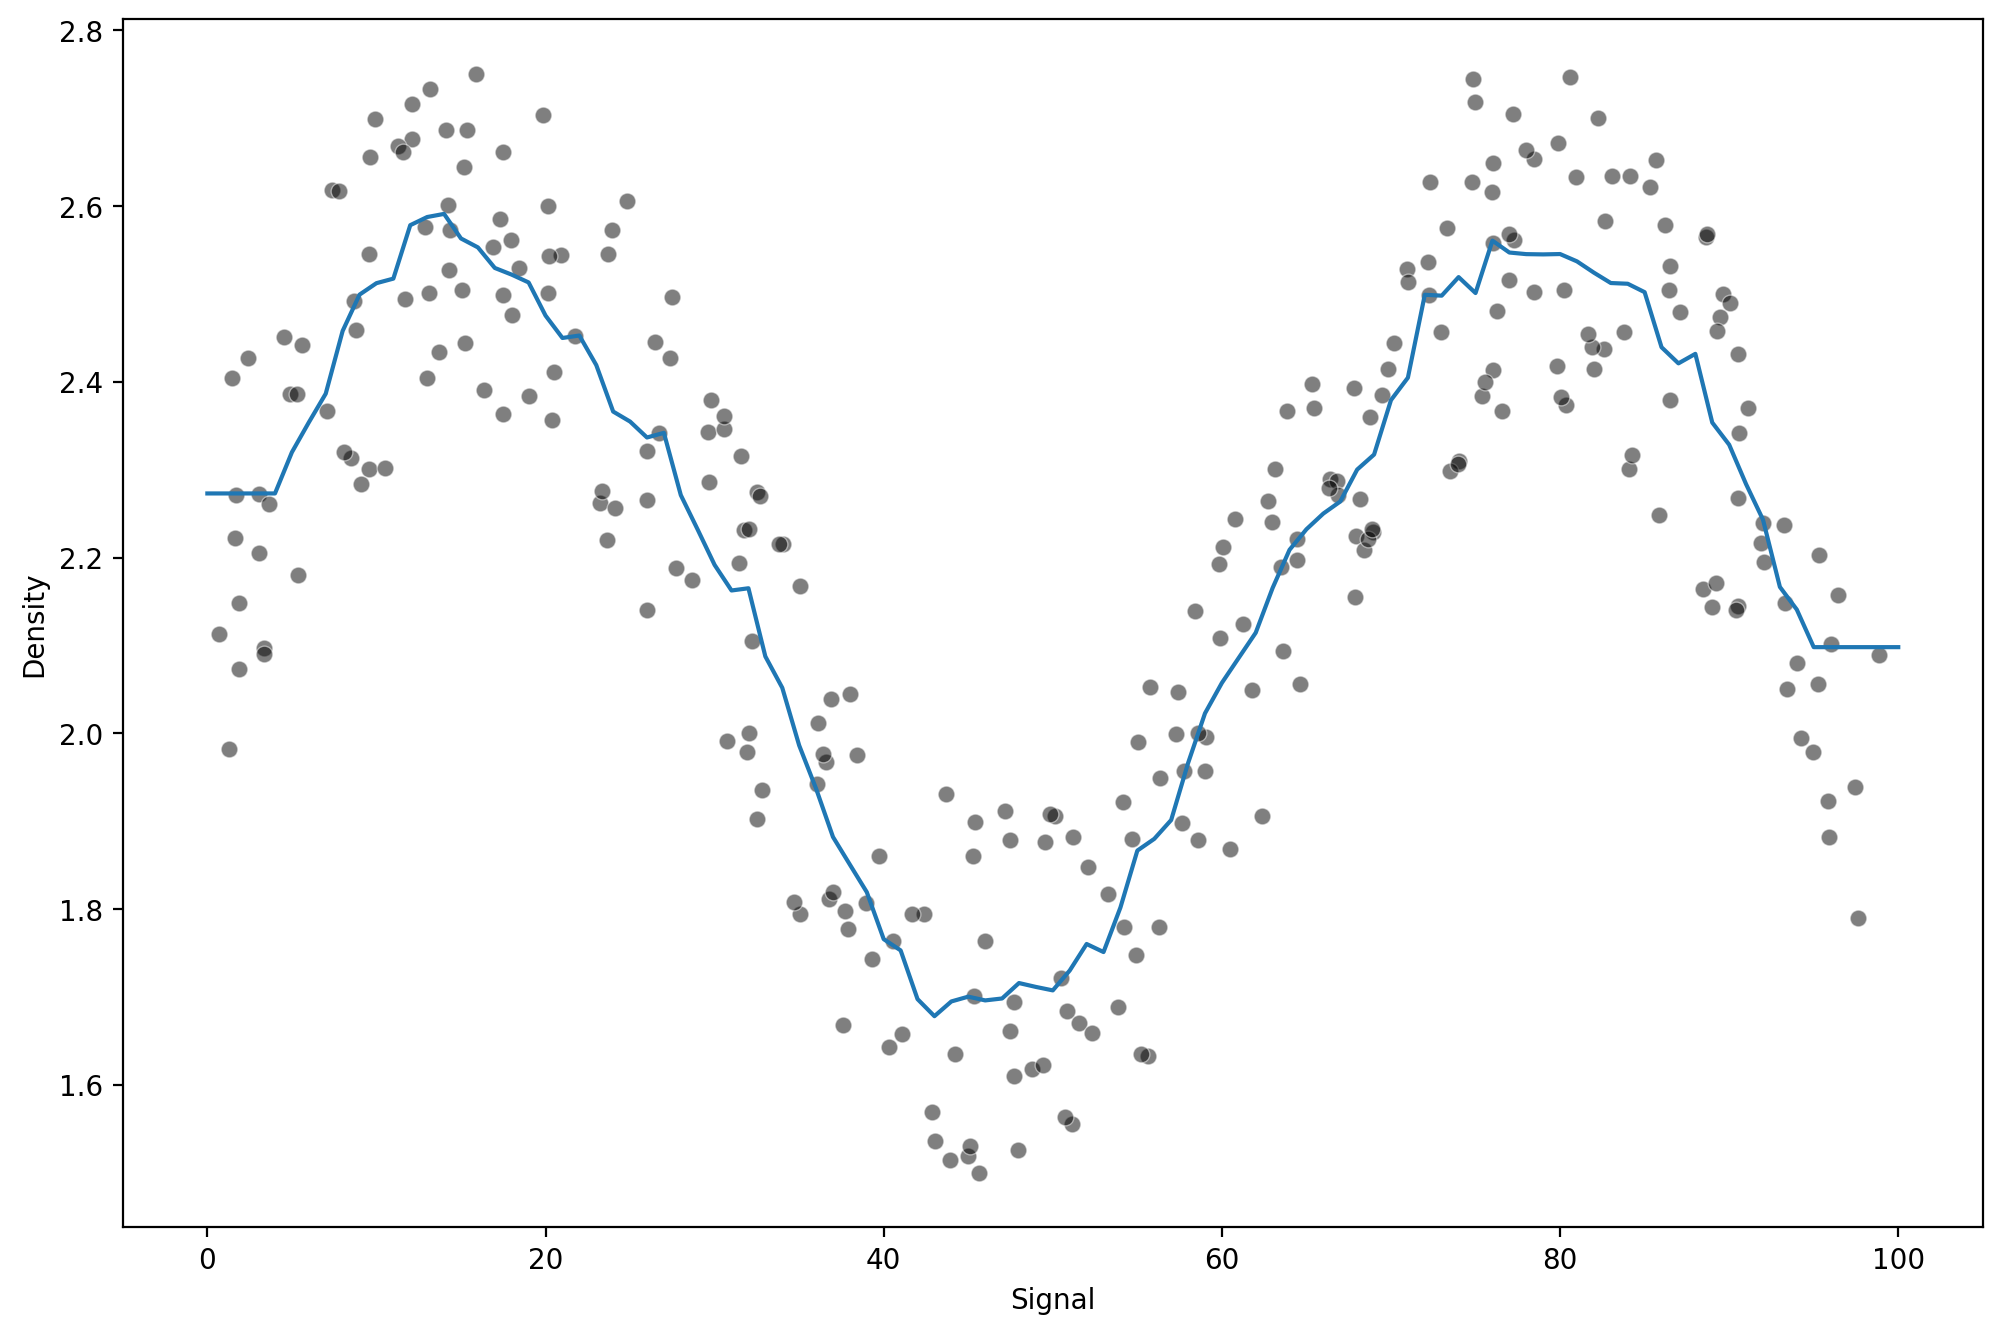

In [35]:
k_values = [1, 2, 4, 8, 16]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model, X_train, y_train, X_test, y_test)

In [36]:
# Single Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


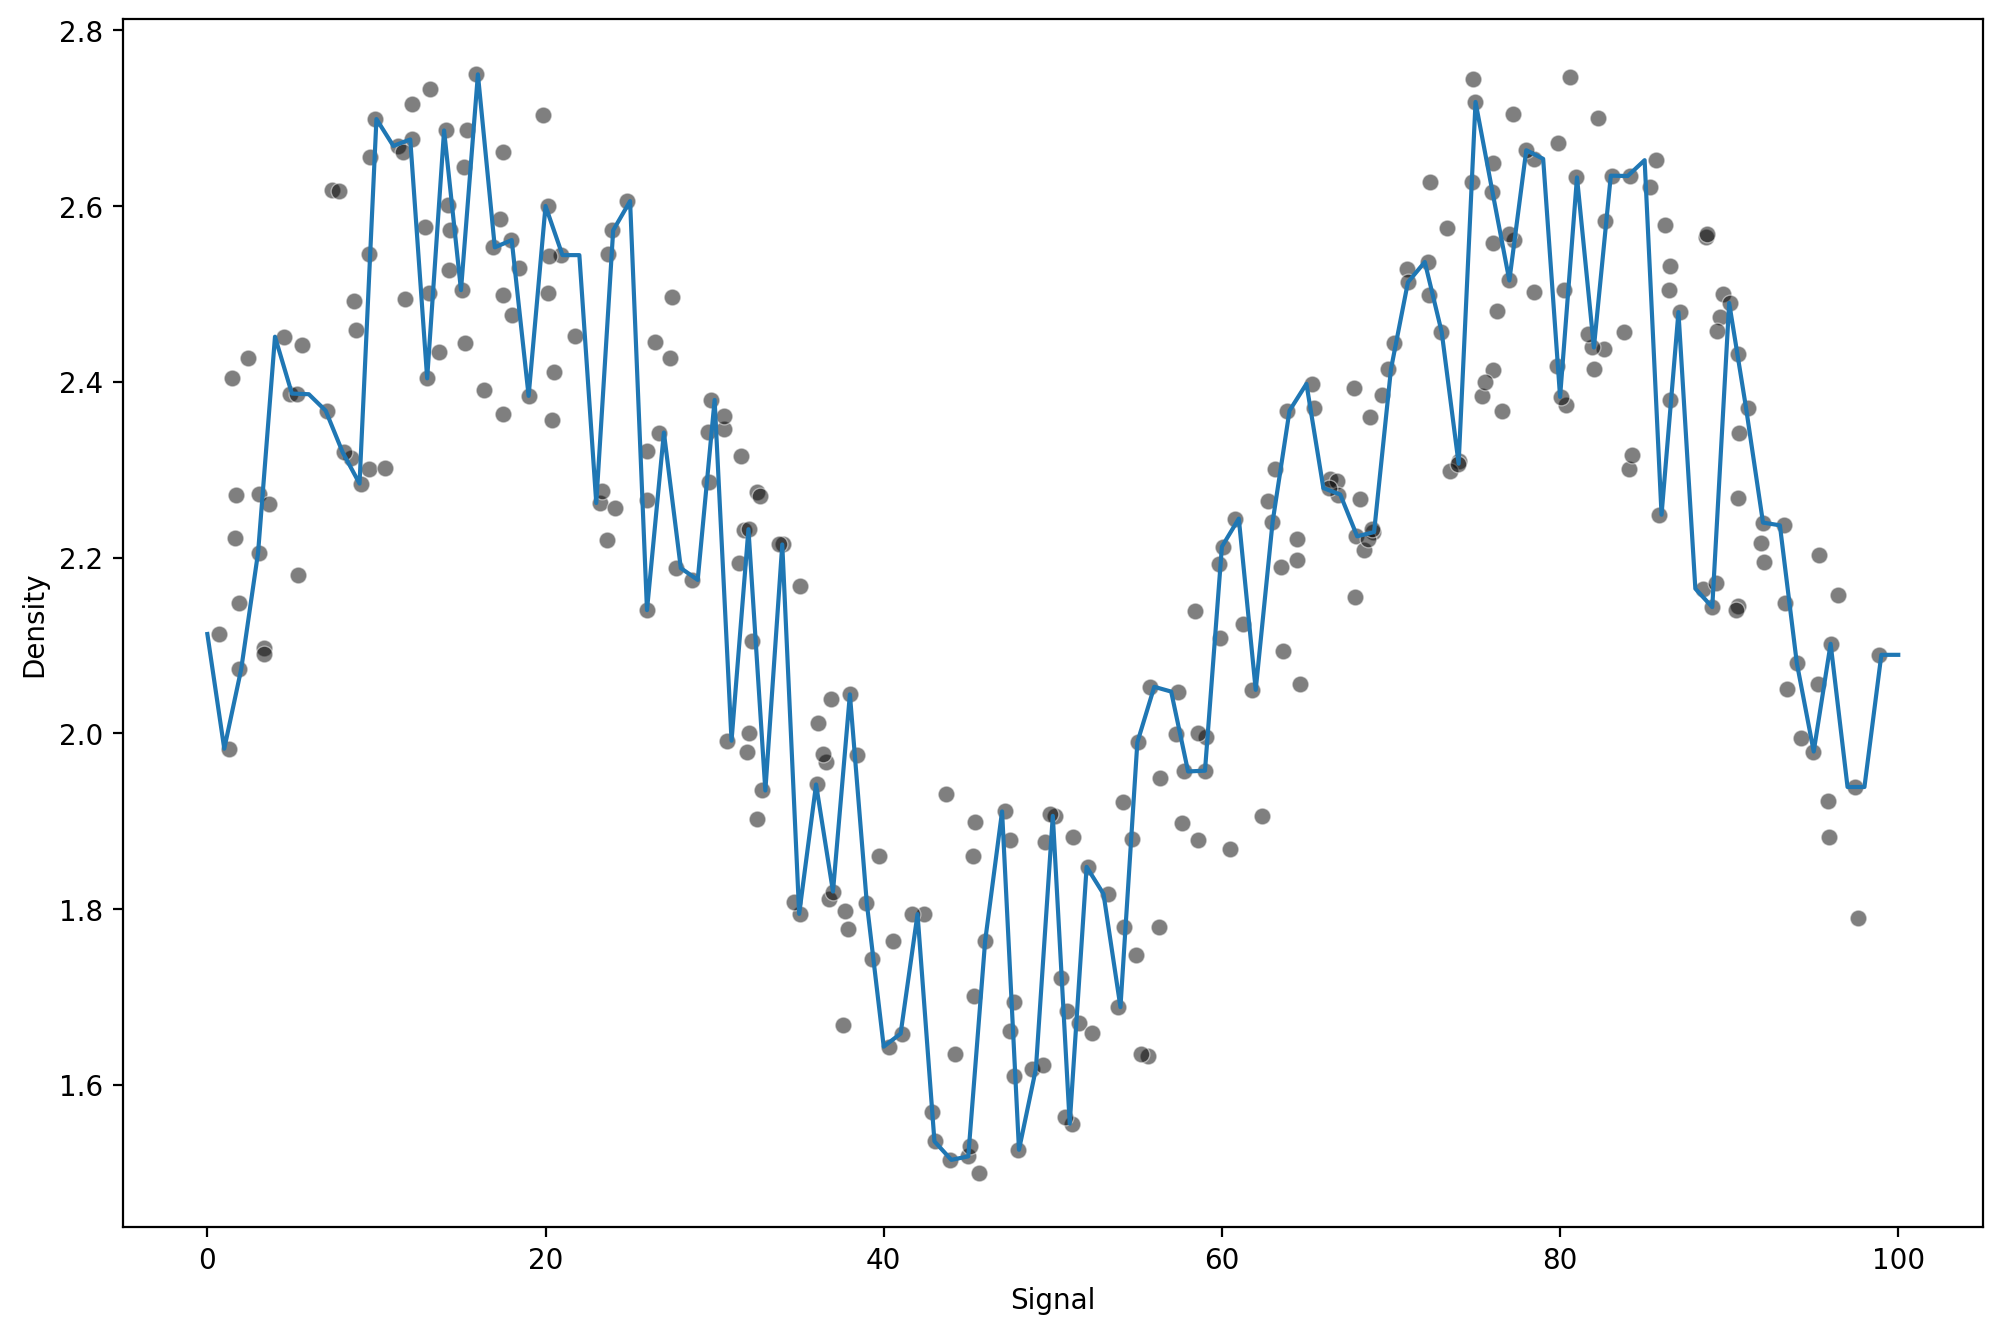

In [37]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [38]:
from sklearn.svm import SVR

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
svr = SVR()

param_grid = {'C': [0.01, 0.1, 1.0, 2, 4, 8, 16, 128, 1024],
              'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

MAE: 0.10844073487874252
RMSE: 0.12634858233081392


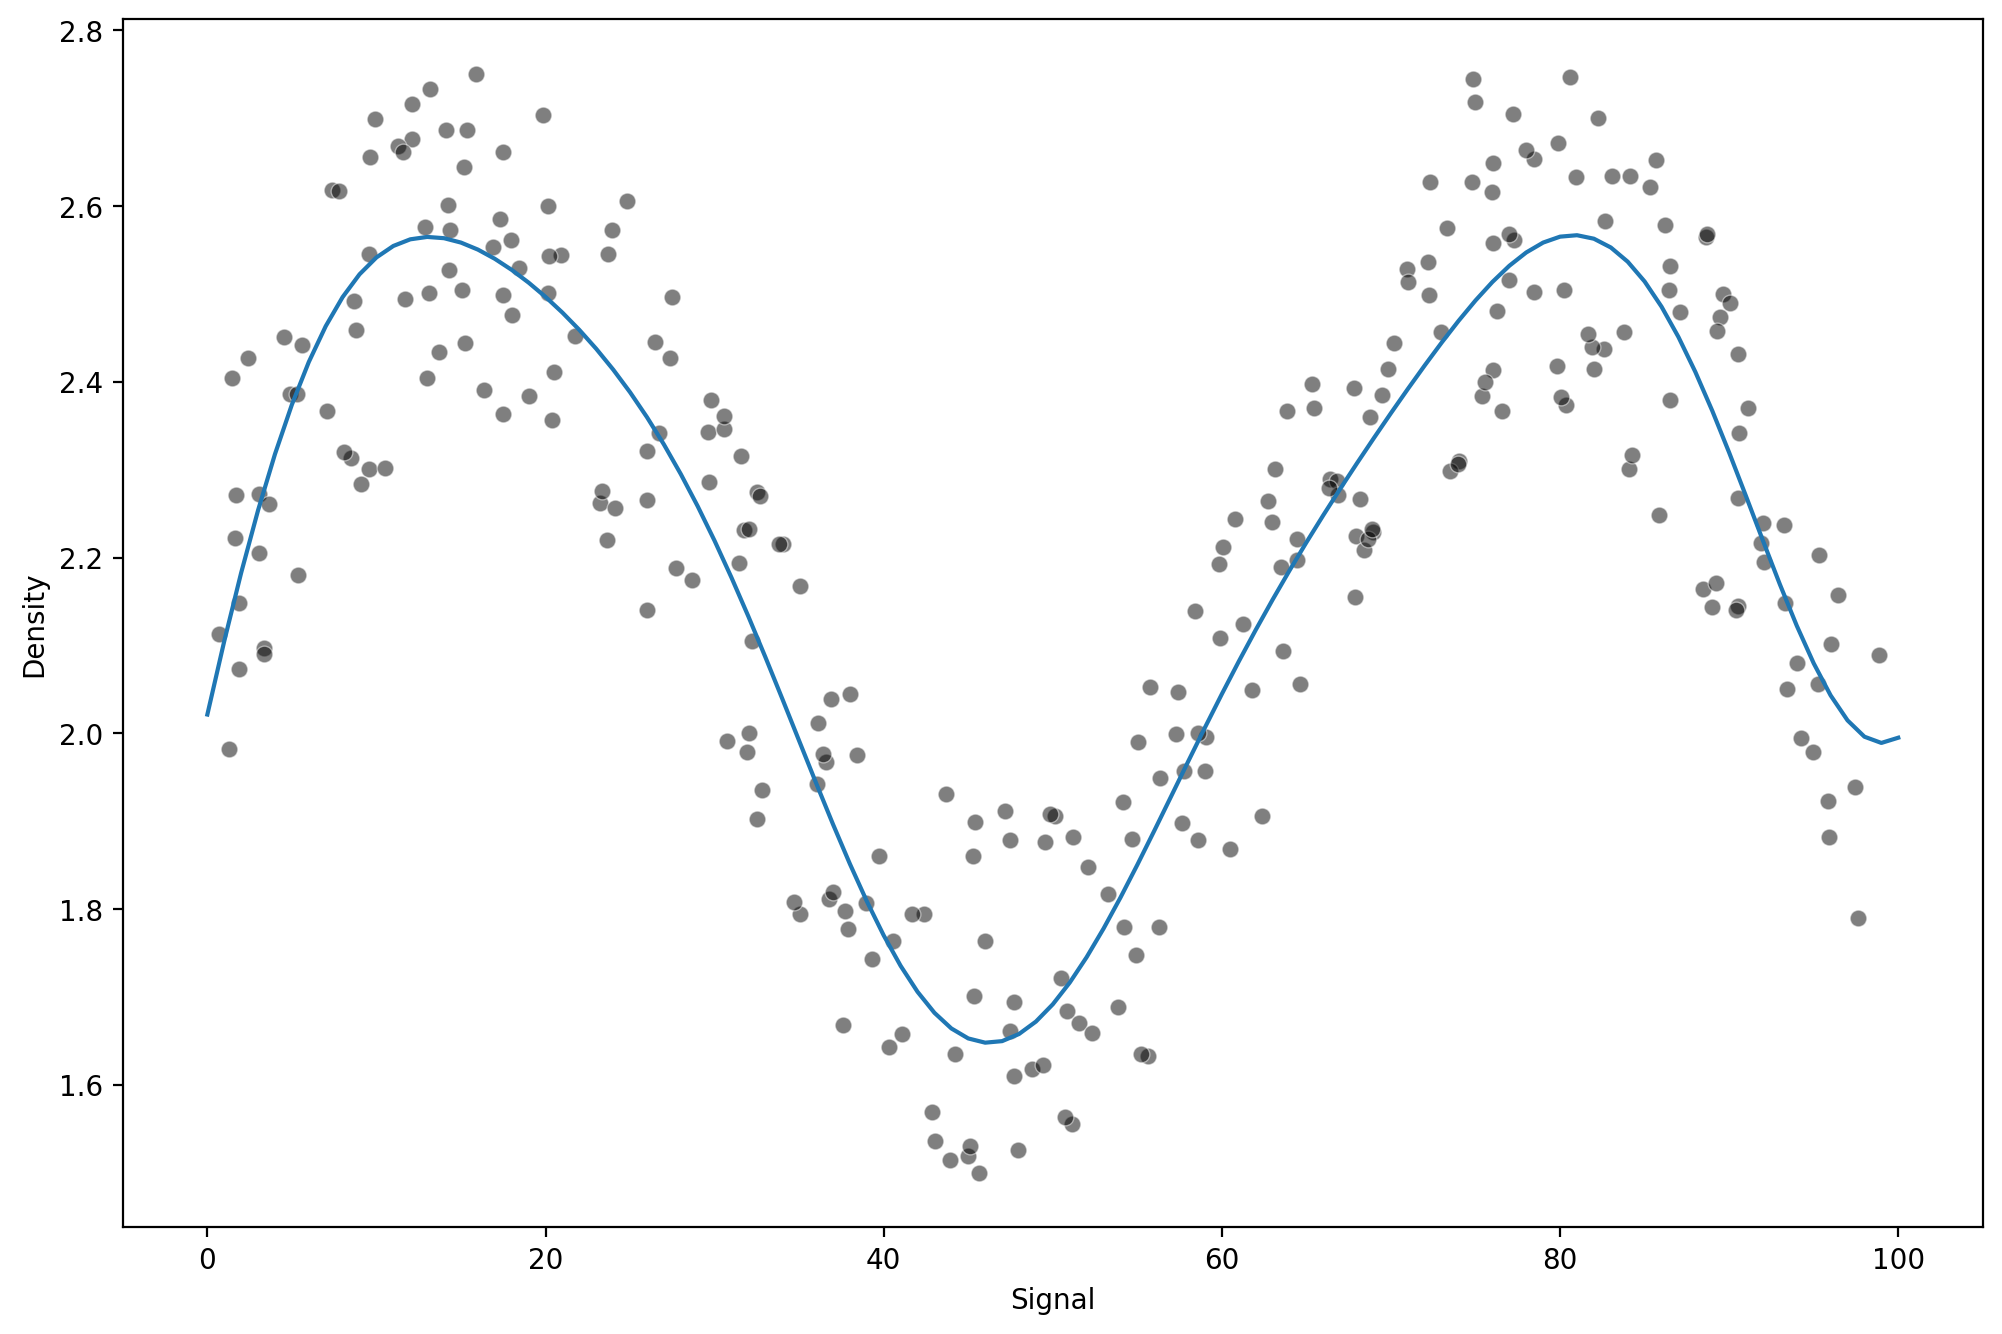

In [41]:
run_model(grid, X_train, y_train, X_test, y_test)

In [42]:
grid.best_params_

{'C': 1024, 'gamma': 'scale'}

In [43]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor(n_estimators=16)

MAE: 0.11166503792924215
RMSE: 0.13593089265469516


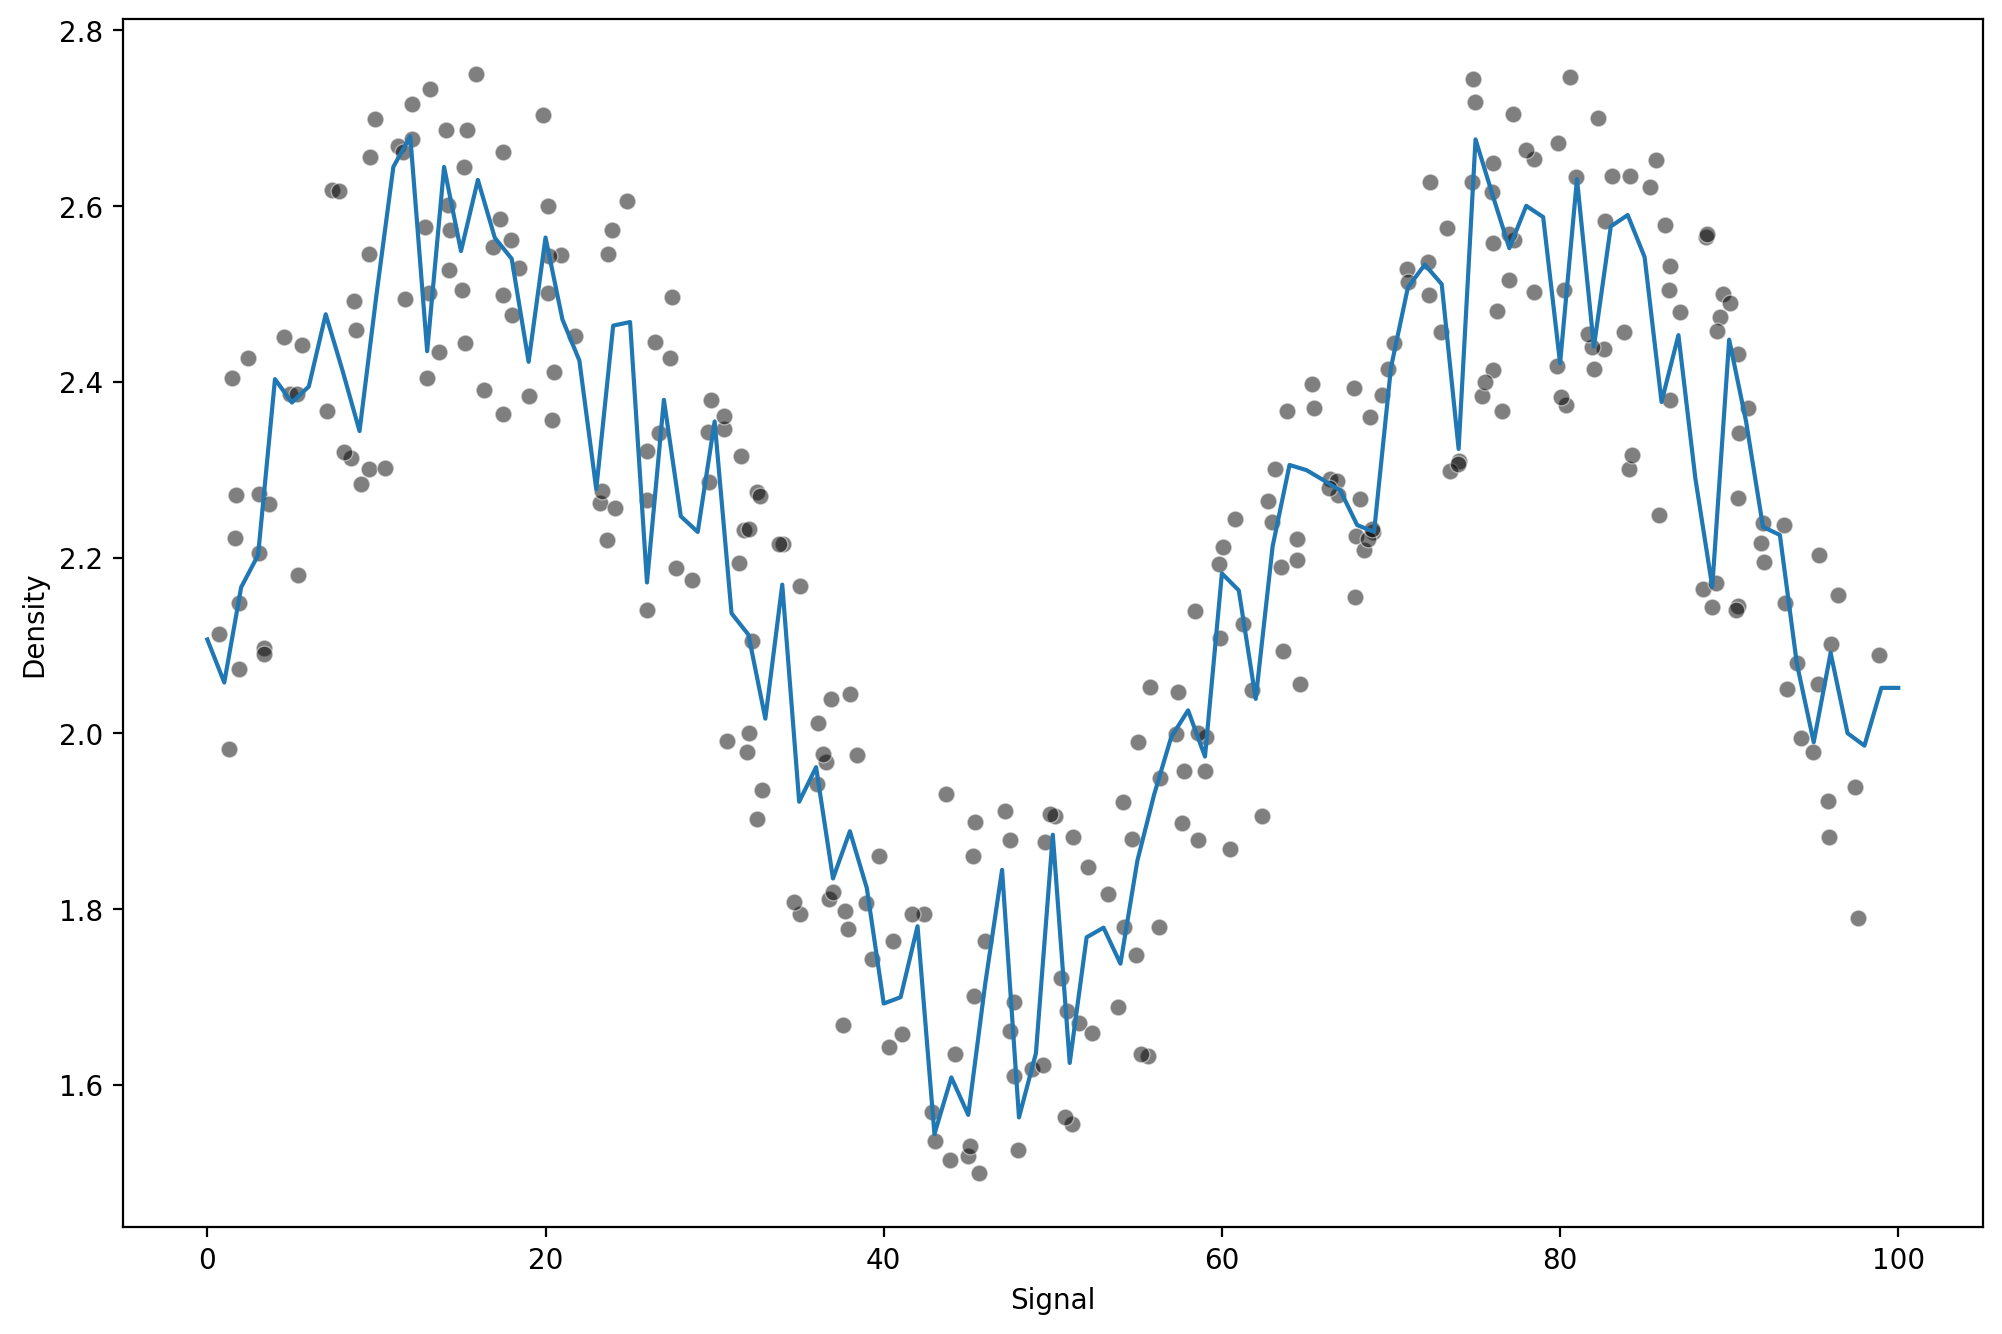

In [45]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


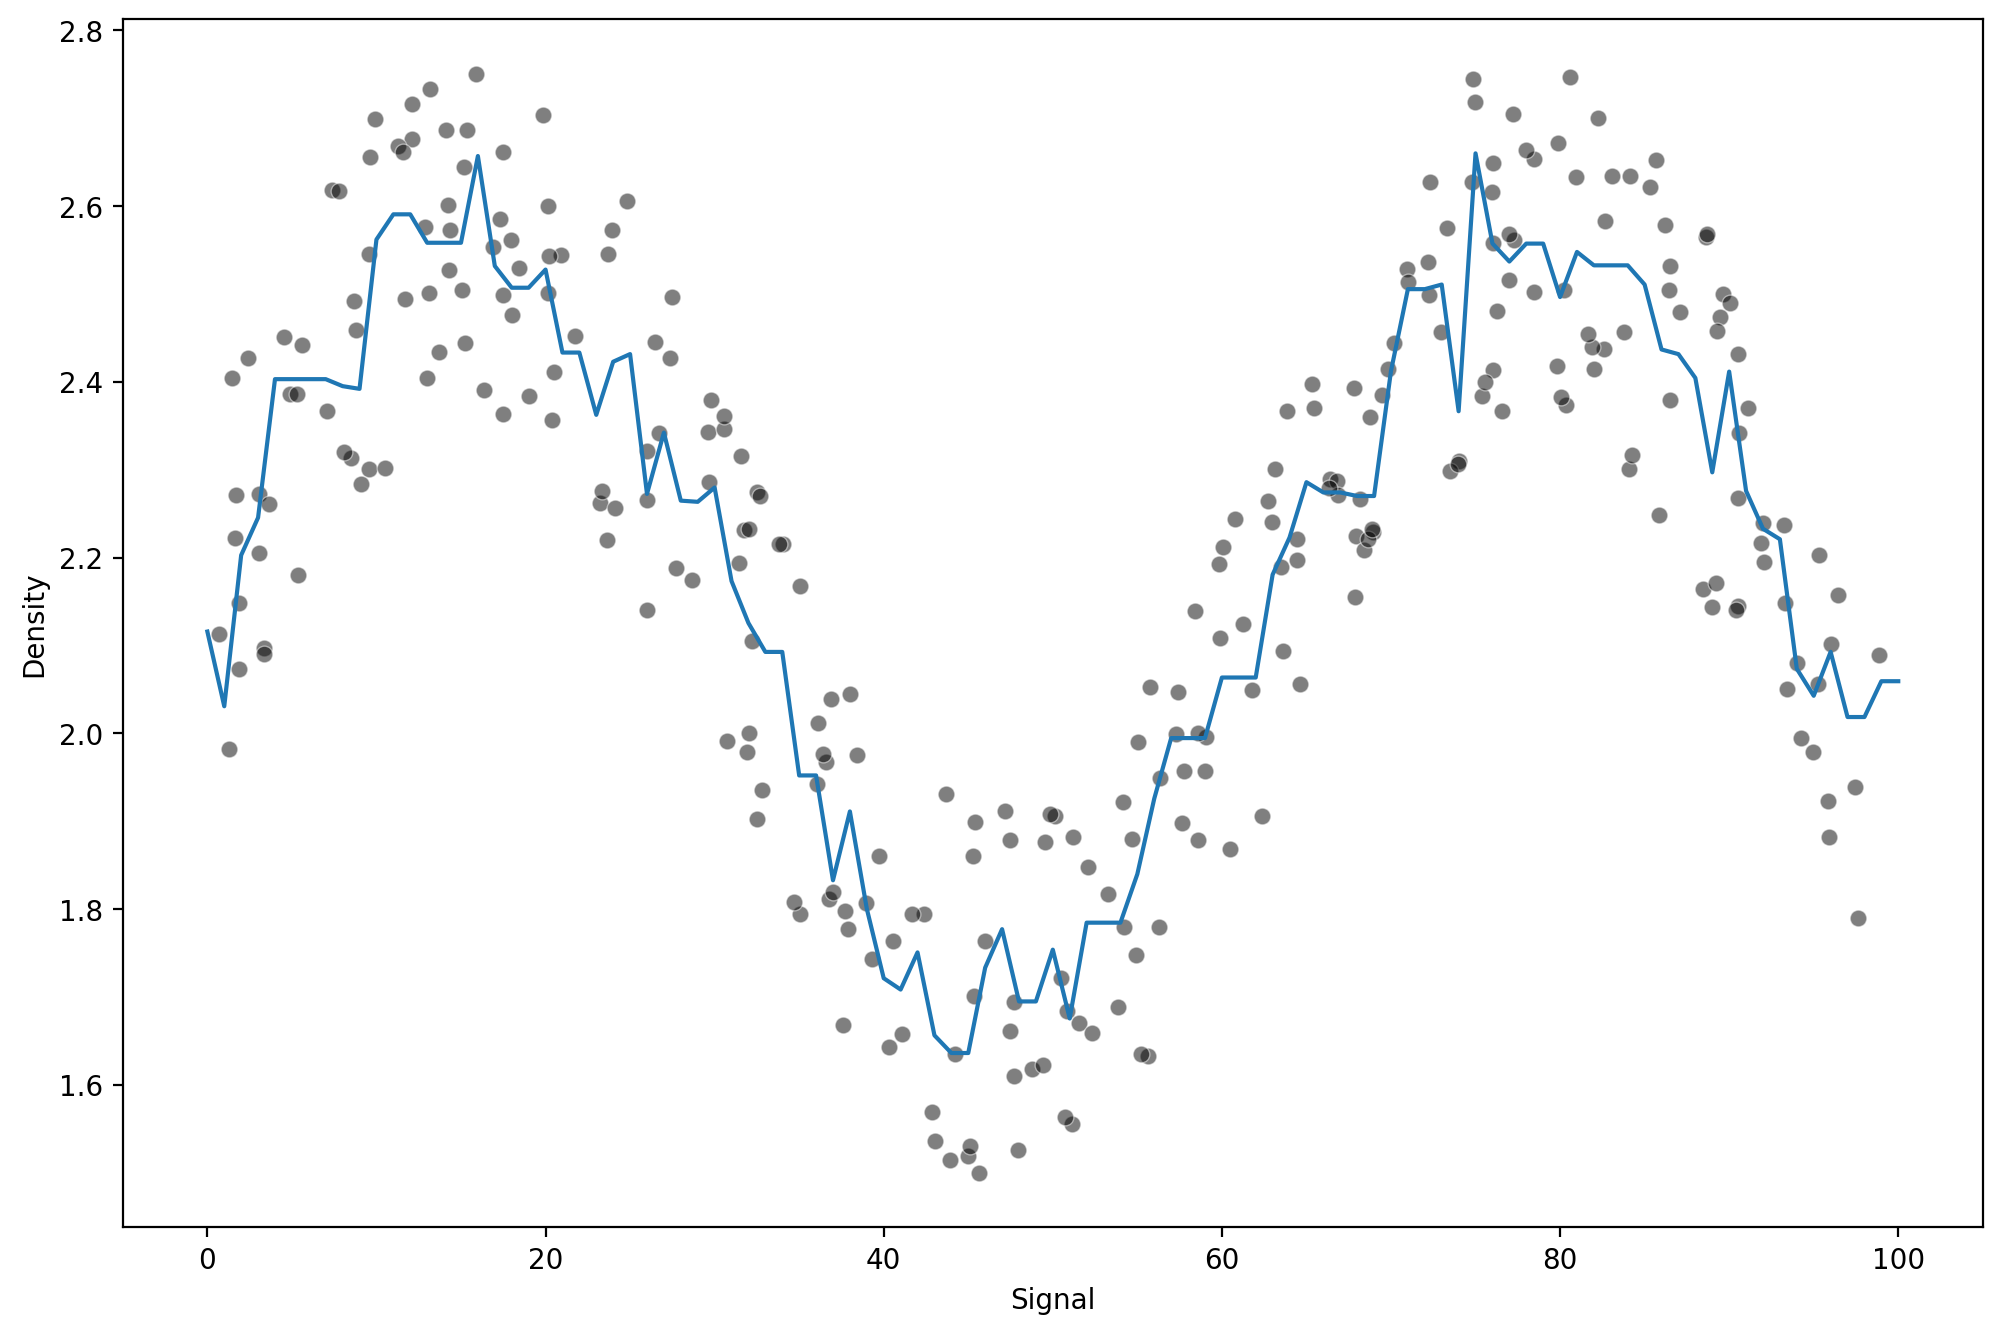

In [48]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11863208428086867
RMSE: 0.13631908435317924


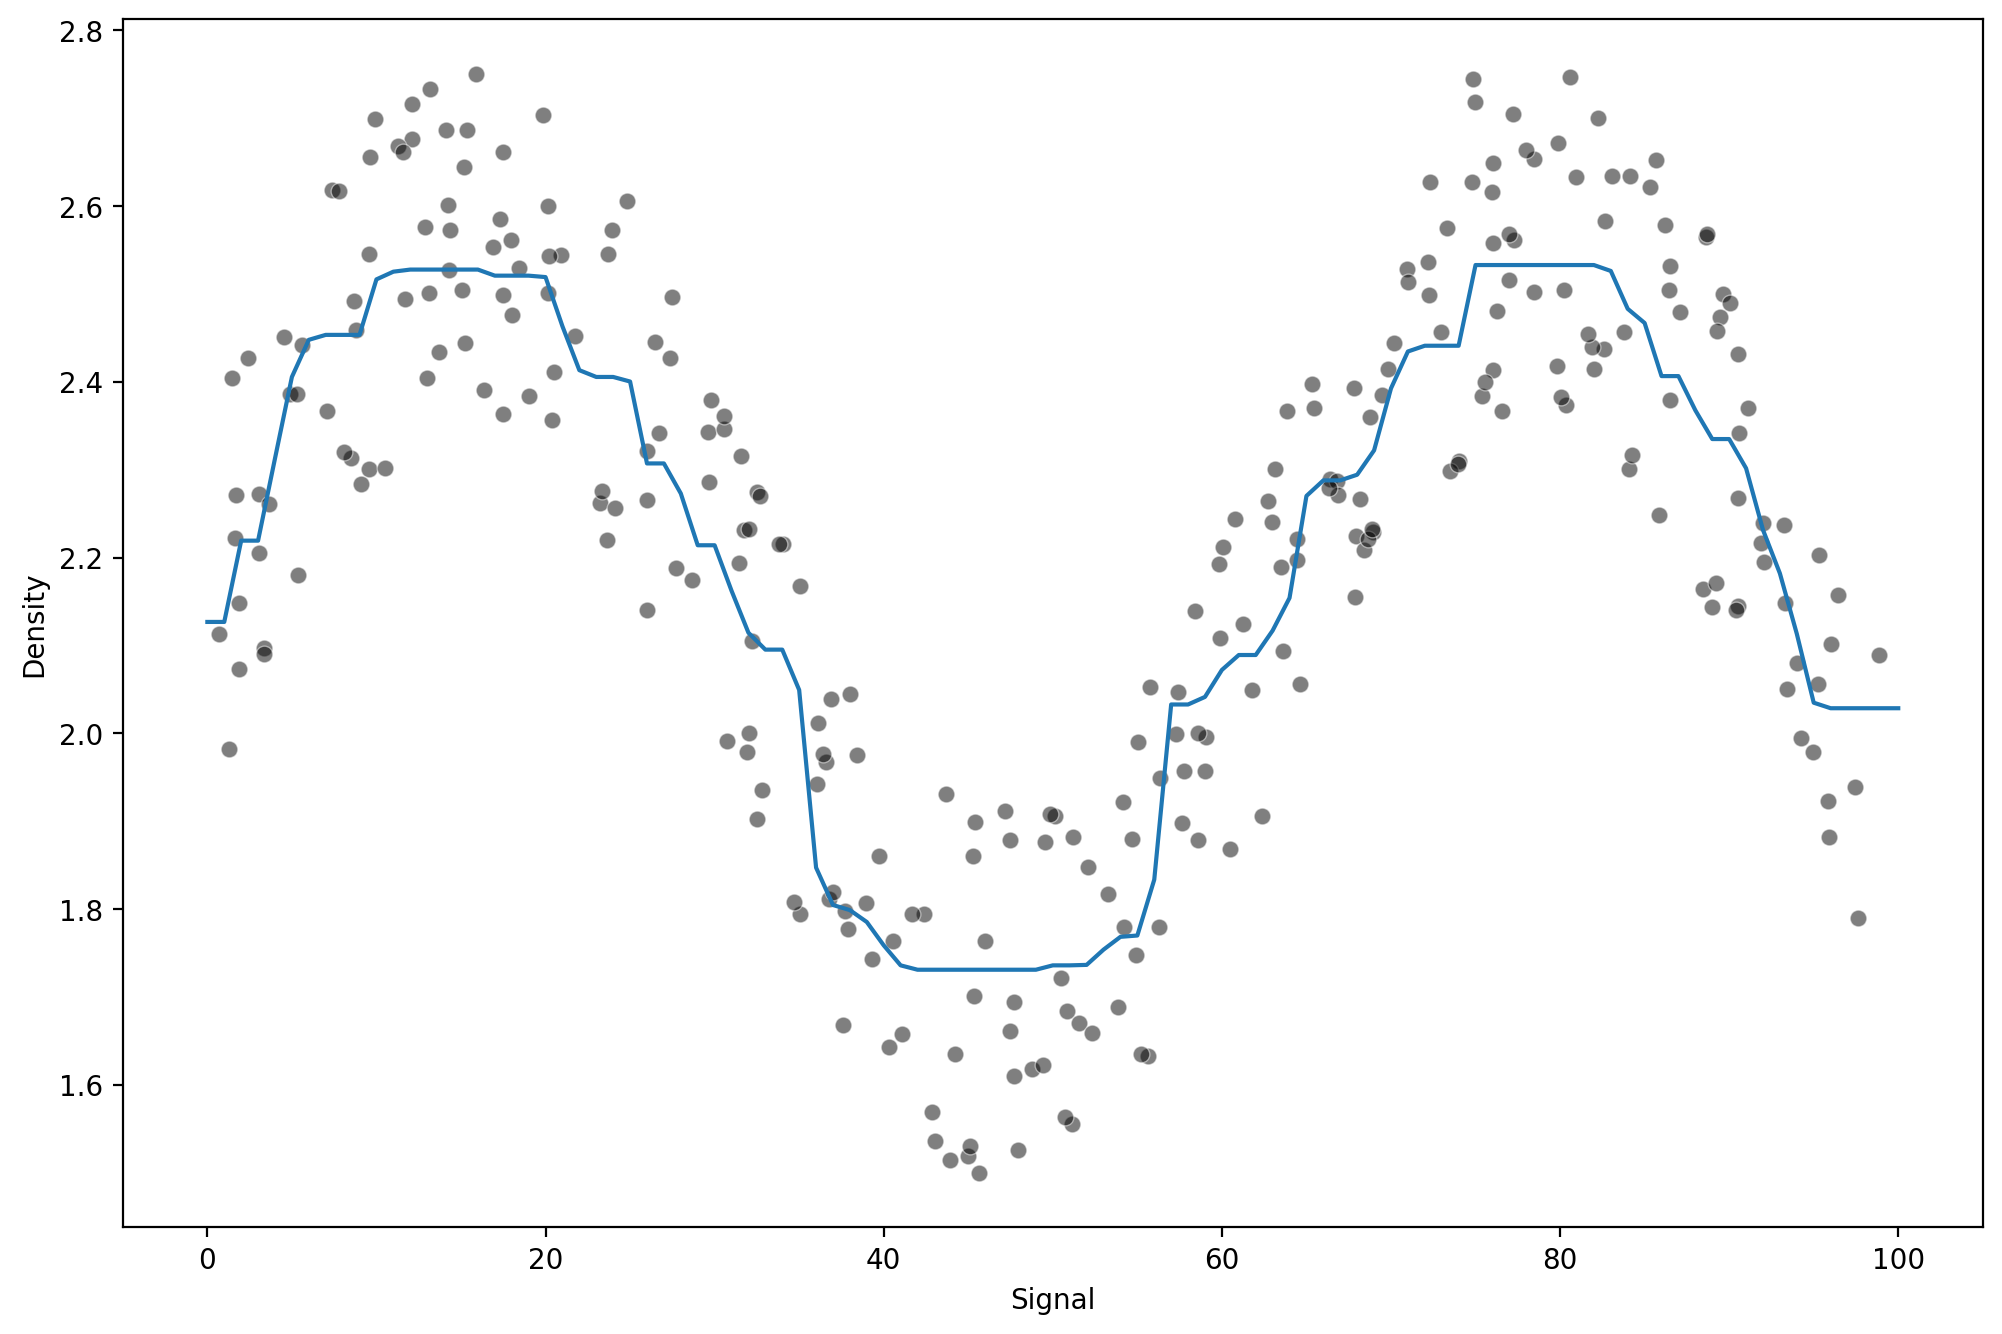

In [50]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [ ]:
# Logistic Regression Model
